In [1]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb

In [2]:
def plot_2outputs(m,xlim,x_1,x_2):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2)

In [3]:
def build_XY(input_list,output_list=None):
    num_outputs = len(input_list)
    Y = np.vstack(output_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])
    I = {'output_index':I[:,None]}
    return X,Y,I

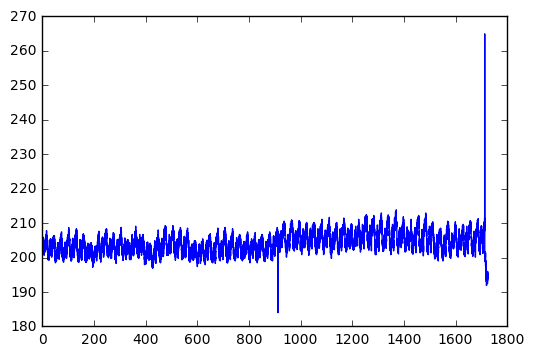

In [4]:
mat_file1 = io.loadmat('2014_Dataset1.mat')
t = mat_file1['t']
p1 = mat_file1['p1']
p2 = mat_file1['p2']
x = np.arange(0,len(p2)/10,0.1)[:,None]
plt.plot(x,p2)
plt.show()

In [5]:
K1 = GPy.kern.RBF(1)
K2 = GPy.kern.Exponential(1)
K3 = GPy.kern.Matern32(1)
K4 = GPy.kern.Matern52(1)
K5 = GPy.kern.PeriodicExponential(1)
K6 = GPy.kern.PeriodicMatern32(1)
K7 = GPy.kern.PeriodicMatern52(1)

In [6]:
i = slice(0, 100)
j = slice(0, 90)

In [7]:
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K2,K4,K5])
mul = GPy.models.GPCoregionalizedRegression([x[i],x[j]],[p1[i],p2[j]],kernel = lcm)

In [13]:
mul['.*Exponential.variance'].constrain_fixed(0.000681553504849)
mul['.*Exponential.lengthscale'].constrain_fixed(45.6982359908)
mul['.*Mat52.variance'].constrain_fixed(53.7449237248)
mul['.*Mat52.lengthscale'].constrain_fixed(48.6298903667)
mul['.*periodic_exponential.variance'].constrain_fixed(0.000139768998473)
mul['.*periodic_exponential.period'].constrain_fixed(5.61635716336)
mul['.*periodic_exponential.lengthscale'].constrain_fixed(17.4730777075)
mul['.*Gaussian_noise_0.variance'].constrain_fixed(1.37062915368e-35)
mul['.*Gaussian_noise_1.variance'].constrain_fixed(0.676744320416)

array([0])

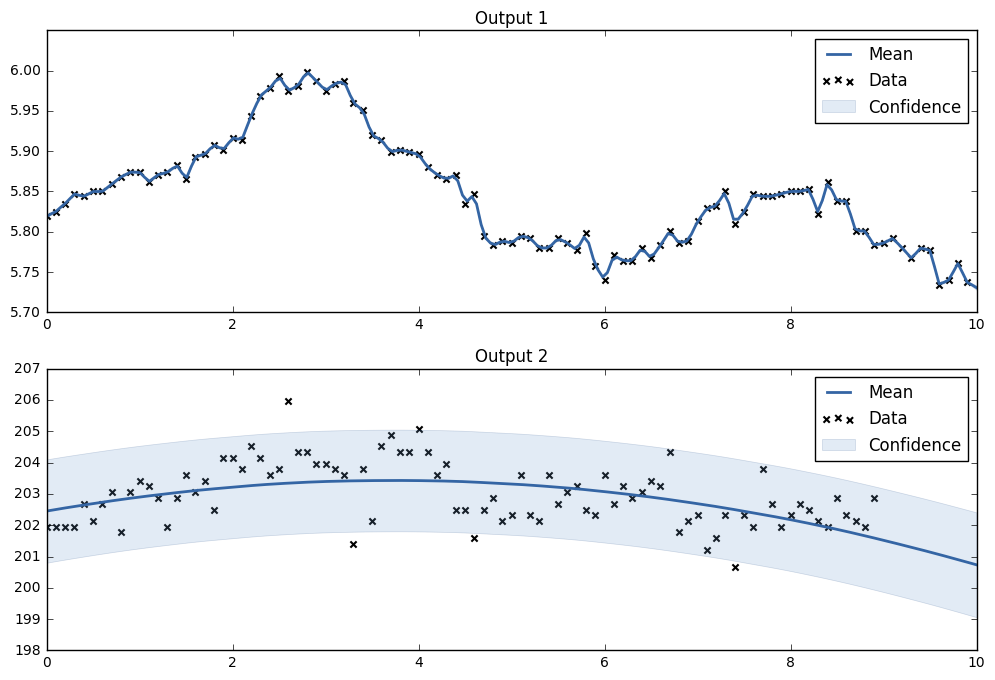

In [14]:
plot_2outputs(mul, xlim=(x[0],x[100]),x_1=x[i],x_2=x[j])
plt.show()

In [8]:
mul

gp.,value,constraints,priors
sum.ICM0.Exponential.variance,1.0,+ve,
sum.ICM0.Exponential.lengthscale,1.0,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.Mat52.variance,1.0,+ve,
sum.ICM1.Mat52.lengthscale,1.0,+ve,
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
sum.ICM2.periodic_exponential.variance,1.0,+ve,
sum.ICM2.periodic_exponential.lengthscale,1.0,+ve,
